<a href="https://colab.research.google.com/github/allenz0935/NCHU-MIS/blob/main/%E7%BE%85%E5%81%89%E5%80%AB_week2%E4%BD%9C%E6%A5%AD_%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99%E3%80%81K%E7%B7%9A%E3%80%81%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>取得股價資料</b>

## 使用 Yahoo Finance 取得資料

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [ ]:
# 輸入股票代號
stock_id = "2049.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=360)

'''抓取特定時間'''
# start = dt.datetime(2025, 1, 1)  # 指定的開始日期
# end = dt.datetime(2025, 9, 19)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-3232897163.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2024-09-27,217.931061,224.849507,211.012614,211.012614,5752267
1,2024-09-30,211.506790,219.413586,211.506790,214.966013,2353967
2,2024-10-01,212.000961,215.460184,207.553389,210.518437,2105243
3,2024-10-04,213.977661,218.919409,209.530088,212.000962,2852777
4,2024-10-07,216.448547,220.401945,214.471848,217.931072,2999166
...,...,...,...,...,...,...
233,2025-09-15,214.000000,217.000000,210.500000,216.500000,3636890
234,2025-09-16,215.000000,215.500000,212.500000,215.000000,2339301
235,2025-09-17,216.000000,218.500000,215.000000,215.500000,2939610
236,2025-09-18,219.000000,223.000000,216.000000,217.500000,4782409


# <b>1. 技術指標的計算</b>
移動動平均線（MA）、相對強弱指數（RSI）、平滑異同移動平均線（MACD）


## 1.1 計算簡單移動平均線（SMA）

In [ ]:
# 計算8日 SMA
df['8_SMA'] = df['Close'].rolling(window=8).mean()

# 計算13日 SMA
df['13_SMA'] = df['Close'].rolling(window=13).mean()

# 計算20日 SMA
df['20_SMA'] = df['Close'].rolling(window=20).mean()

# 列印最後筆數
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA
233,2025-09-15,214.0,217.0,210.5,216.5,3636890,212.3750,211.115385,210.600
234,2025-09-16,215.0,215.5,212.5,215.0,2339301,213.5000,211.076923,210.775
235,2025-09-17,216.0,218.5,215.0,215.5,2939610,214.5000,211.269231,211.425
236,2025-09-18,219.0,223.0,216.0,217.5,4782409,216.1250,212.192308,212.075
237,2025-09-19,223.0,226.0,219.5,222.0,6158370,216.4375,213.615385,213.075


## 1.2 計算相對強弱指數（RSI）

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-01.jpg" alt="rsi" width="500"/>

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-02.jpg" alt="rs" width="500"/>

In [ ]:
# 計算每個交易日的價格變動，即當天收盤價與前一天收盤價的差異
df['Change'] = df['Close'] - df['Close'].shift(1)

# 將變動值中的正數部分視為“Gain”（增益），如果變動為負則記為0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# 將變動值中的負數部分視為“Loss”（損失），取其絕對值，如果變動為正則記為0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail()

# 計算過去14個交易日的平均增益
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()

# 計算過去14個交易日的平均損失
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# 計算相對強弱指數的相對強度（RS），即平均增益與平均損失的比值
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# 計算相對強弱指數（RSI），使用RS公式計算出來
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 顯示最後幾行的數據
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
233,2025-09-15,214.0,217.0,210.5,216.5,3636890,212.3750,211.115385,210.600,-3.5,0.0,3.5,1.857143,1.857143,1.000000,50.000000
234,2025-09-16,215.0,215.5,212.5,215.0,2339301,213.5000,211.076923,210.775,1.0,1.0,0.0,1.857143,1.857143,1.000000,50.000000
235,2025-09-17,216.0,218.5,215.0,215.5,2939610,214.5000,211.269231,211.425,1.0,1.0,0.0,1.892857,1.857143,1.019231,50.476190
236,2025-09-18,219.0,223.0,216.0,217.5,4782409,216.1250,212.192308,212.075,3.0,3.0,0.0,2.107143,1.714286,1.229167,55.140187
237,2025-09-19,223.0,226.0,219.5,222.0,6158370,216.4375,213.615385,213.075,4.0,4.0,0.0,2.392857,1.250000,1.914286,65.686275


## 1.3 計算平滑異同移動平均線（MACD）

In [ ]:
'''
第一日
# 平滑係數公式： α = 2 / (span + 1) = 2 / (span + 1)
# α = 2 / (8 + 1) = 2 / (8 + 1) ≈ 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''

# 計算8天的指數移動平均線（EMA），並將其存儲在 'EMA_8' 列中
# adjust=False 表示在計算 EMA 時，只考慮當前值和前一個 EMA 的遞歸計算方式，而不考慮所有歷史數據
df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()

# 計算13天的指數移動平均線（EMA），並將其存儲在 'EMA_13' 列中
df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

# 計算MACD線：8天EMA減去13天EMA，並將其存儲在 'MACD' 列中
df['MACD'] = df['EMA_8'] - df['EMA_13']

# 顯示DataFrame的最後幾行數據
df.head(3)

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
0,2024-09-27,217.931061,224.849507,211.012614,211.012614,5752267,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,217.931061,217.931061,0.000000
1,2024-09-30,211.506790,219.413586,211.506790,214.966013,2353967,NaN,NaN,NaN,-6.424271,0.000000,6.424271,NaN,NaN,NaN,NaN,216.503445,217.013308,-0.509863
2,2024-10-01,212.000961,215.460184,207.553389,210.518437,2105243,NaN,NaN,NaN,0.494171,0.494171,0.000000,NaN,NaN,NaN,NaN,215.502893,216.297258,-0.794365


# <b>2. 資料可視化</b>
K 線型態的捕捉

## 2.1 可視化收盤價折線圖

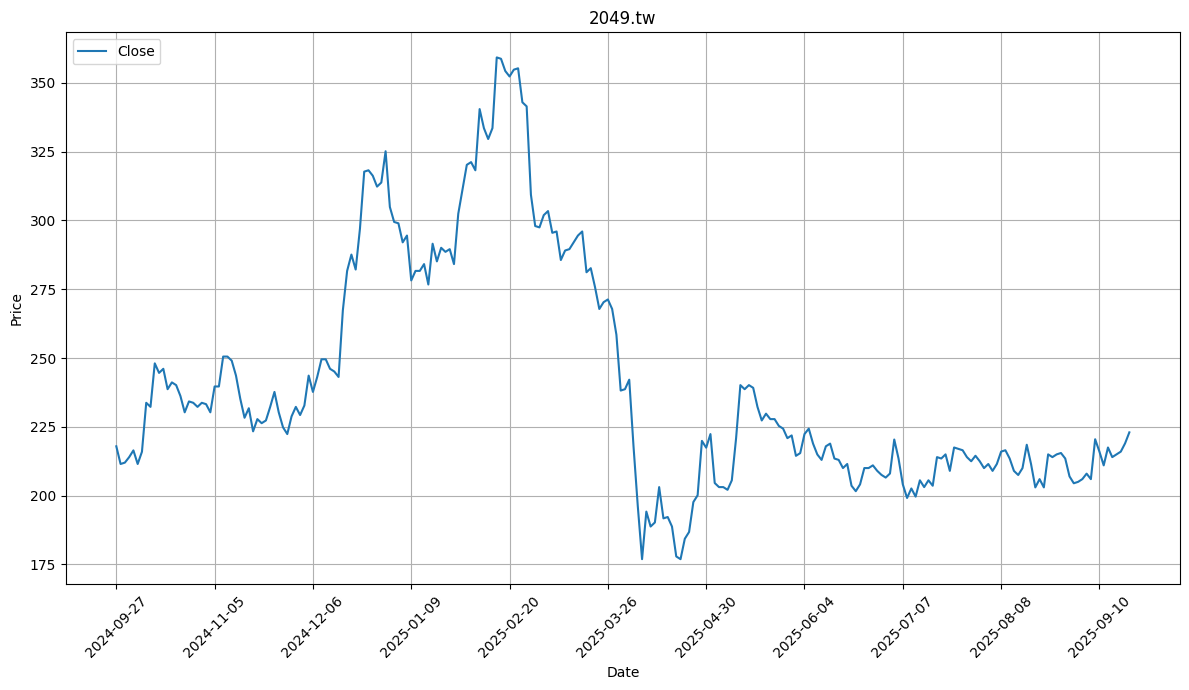

In [ ]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 2.2 加入技術指標

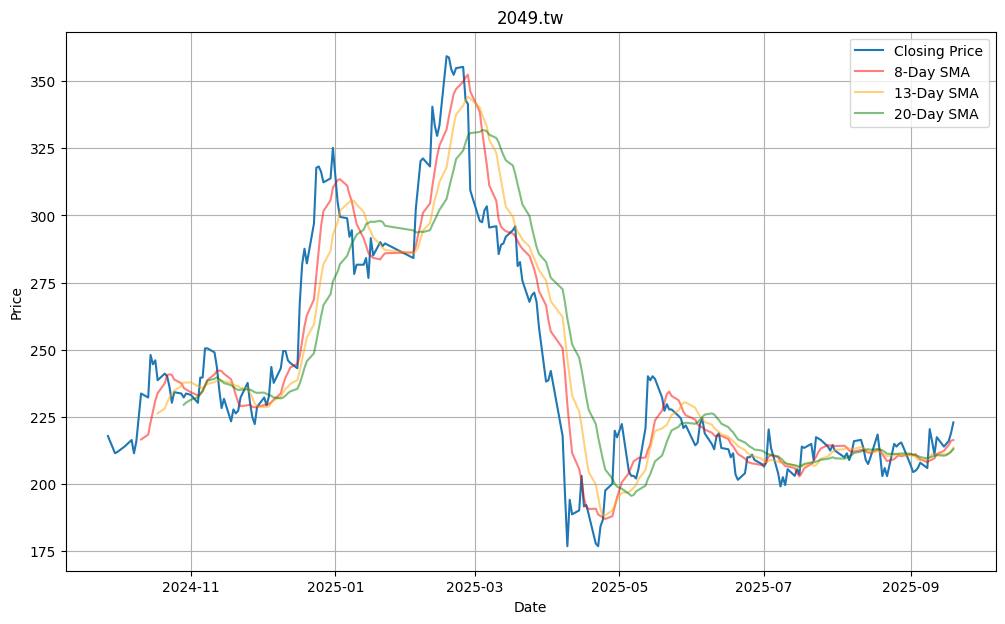

In [ ]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 8 天的 SMA
plt.plot(df['Date'], df['8_SMA'], label='8-Day SMA', color='red', alpha=.5)

# 13 天的 SMA
plt.plot(df['Date'], df['13_SMA'], label='13-Day SMA', color='orange', alpha=.5)

# 20 天的 SMA
plt.plot(df['Date'], df['20_SMA'], label='20-Day SMA', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

## 2.3 K 線

In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')
kplot_df['2025-01-01':'2025-09-19'].tail()

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
Date,,,,,,,,,,,,,,,,,,
2025-09-15,214.0,217.0,210.5,216.5,3636890,212.3750,211.115385,210.600,-3.5,0.0,3.5,1.857143,1.857143,1.000000,50.000000,213.132959,212.259399,0.873560
2025-09-16,215.0,215.5,212.5,215.0,2339301,213.5000,211.076923,210.775,1.0,1.0,0.0,1.857143,1.857143,1.000000,50.000000,213.547857,212.650914,0.896944
2025-09-17,216.0,218.5,215.0,215.5,2939610,214.5000,211.269231,211.425,1.0,1.0,0.0,1.892857,1.857143,1.019231,50.476190,214.092778,213.129355,0.963423
2025-09-18,219.0,223.0,216.0,217.5,4782409,216.1250,212.192308,212.075,3.0,3.0,0.0,2.107143,1.714286,1.229167,55.140187,215.183272,213.968018,1.215253
2025-09-19,223.0,226.0,219.5,222.0,6158370,216.4375,213.615385,213.075,4.0,4.0,0.0,2.392857,1.250000,1.914286,65.686275,216.920322,215.258301,1.662021


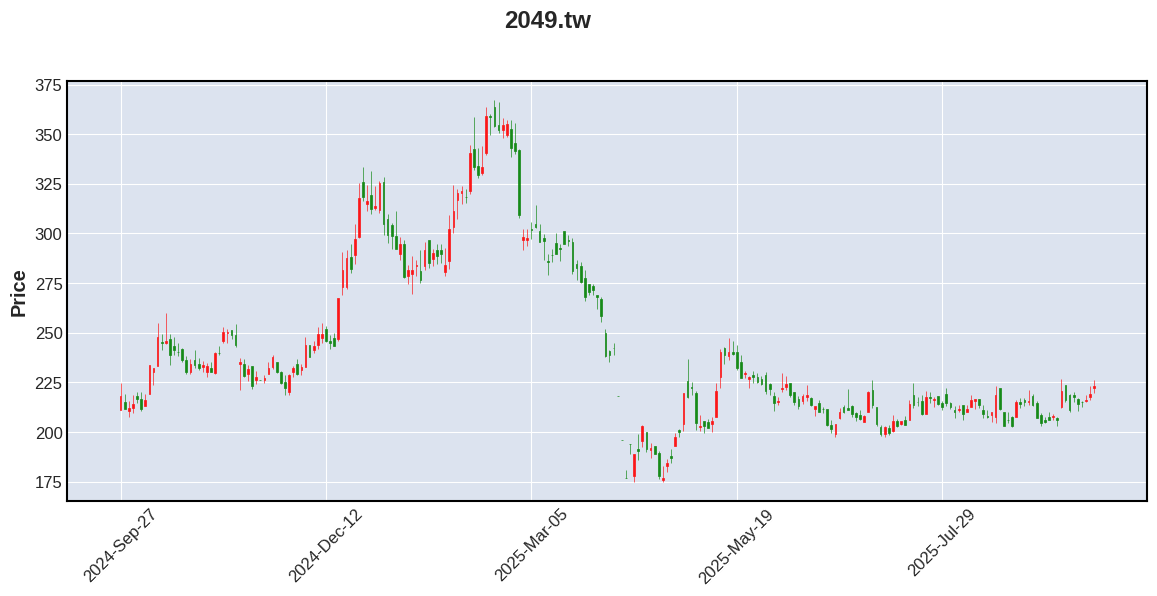

In [ ]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

## 2.4 捕捉 Hammer 型態

錘形線（Hammer）

<img src="https://drive.google.com/uc?id=1M5t0g5kKCm2xfzRaFHfKt_CT41XSRjgb" alt="drawing" width="600"/>

In [ ]:
# 計算 K 線長度 = abs(收盤-開盤)
df['body_length'] = abs(df['Close'] - df['Open'])

# 計算下影線長度 = abs(最高-最小)
df['lower_shadow'] = abs(df['Low'] - df[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df['upper_shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))

#print('df',df)
# 定義 Hammer 型態的條件
hammer_condition = (
    (df['lower_shadow'] > 2 * df['body_length']) &  # 下影線長於實體的两倍
    (df['upper_shadow'] < df['body_length'] * 0.1) &  # 上影線很短
    (df['body_length'] < (df['High'] - df['Low']) * 0.4)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-14,232.262131,232.262131,223.861160,230.285432,5064605,218.425238,NaN,NaN,-1.482529,0.0,...,NaN,NaN,NaN,NaN,222.003367,220.105771,1.897595,1.976699,6.424272,0.0
2025-03-27,267.842712,268.831062,261.912615,268.831062,3096521,276.614319,281.831660,288.276840,-3.459229,0.0,...,1.129545,3.106245,0.363637,26.666691,275.819005,281.986231,-6.167226,0.988349,5.930097,0.0
2025-06-16,212.989319,212.989319,208.047571,211.506795,2385843,216.819172,217.664971,221.217327,-0.494171,0.0,...,1.200138,2.082593,0.576271,36.559129,216.348886,217.740976,-1.392091,1.482524,3.459223,0.0
2025-08-11,216.500000,216.500000,211.500000,215.500000,2145127,212.687500,213.769231,212.139125,0.500000,0.5,...,1.392857,1.285714,1.083333,52.000000,213.441962,212.847423,0.594539,1.000000,4.000000,0.0
2025-08-15,210.000000,210.000000,205.000000,208.500000,3357716,211.625000,211.846154,212.825000,2.500000,2.5,...,0.964286,1.428571,0.675000,40.298507,211.059008,211.440758,-0.381750,1.500000,3.500000,0.0


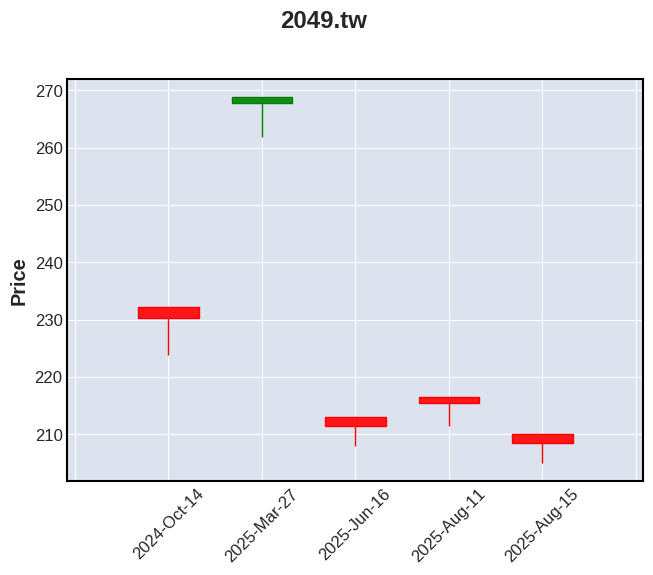

In [ ]:
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

## 2.5 捕捉 Doji 型態

十字線（Doji）

<img src="https://drive.google.com/uc?id=1BDfcn8ZmMVgl0Xlku7mSD338WHeffrgc" alt="drawing" width="600"/>

In [ ]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-17,246.099030,259.935923,244.122331,245.110680,13810760,231.088469,NaN,NaN,1.482529,1.482529,...,NaN,NaN,NaN,NaN,234.771328,229.756030,5.015298,0.988350,0.988350,13.836893
2024-10-22,240.168930,244.616503,238.192231,240.168930,2641279,240.601332,230.361460,NaN,-0.988342,0.000000,...,3.353330,1.764911,1.900000,65.517236,237.600845,233.576956,4.023888,0.000000,1.976699,4.447573
2024-11-06,239.674759,243.133982,238.686409,239.674759,1721912,234.609465,235.645329,234.782424,0.000000,0.000000,...,1.341333,1.694314,0.791667,44.186057,235.762504,234.744708,1.017796,0.000000,0.988350,3.459223
2024-11-08,250.546600,252.029125,244.616503,250.052426,3714119,238.748178,237.279908,238.464027,0.000000,0.000000,...,2.011998,1.164841,1.727273,63.333336,241.603135,238.937046,2.666088,0.494175,5.435922,1.482524
2024-11-13,235.227173,237.203872,221.390280,234.238823,8993622,242.330944,238.914486,239.155871,-8.400986,0.000000,...,1.835507,1.906104,0.962963,49.056597,241.539238,240.044381,1.494856,0.988349,12.848543,1.976699
2024-11-20,226.332031,226.332031,226.332031,226.332031,1035165,233.188709,236.633679,235.498978,-1.482529,0.000000,...,2.011998,2.541471,0.791667,44.186043,231.247190,233.188036,-1.940845,0.000000,0.000000,0.000000
2024-12-30,313.800964,323.684459,311.824265,312.812615,9883466,305.647083,286.811421,270.708927,1.482513,1.482513,...,5.859501,1.270736,4.611110,82.178214,303.282131,291.792978,11.489154,0.988349,0.988349,9.883495
2025-01-14,284.150482,286.621356,278.714560,283.656307,4781957,288.845139,298.709630,296.751936,2.470886,2.470886,...,1.553118,3.953395,0.392857,28.205108,288.547739,289.924875,-1.377136,0.494175,4.941748,2.470874
2025-02-10,318.248535,322.201933,315.283487,318.248535,4804246,304.473415,297.189089,294.503439,-2.965057,0.000000,...,4.306381,1.694314,2.541666,71.764703,308.194219,302.947840,5.246378,0.000000,2.965048,3.953398


In [ ]:
doji_df.index

DatetimeIndex(['2024-10-17', '2024-10-22', '2024-11-06', '2024-11-08',
               '2024-11-13', '2024-11-20', '2024-12-30', '2025-01-14',
               '2025-02-10', '2025-02-18', '2025-03-05', '2025-03-11',
               '2025-03-12', '2025-03-14', '2025-03-18', '2025-04-02',
               '2025-04-07', '2025-04-08', '2025-04-09', '2025-04-10',
               '2025-05-02', '2025-05-06', '2025-06-04', '2025-06-18',
               '2025-06-26', '2025-07-21', '2025-07-24', '2025-07-25',
               '2025-08-21', '2025-08-28', '2025-09-16'],
              dtype='datetime64[ns]', name='Date', freq=None)

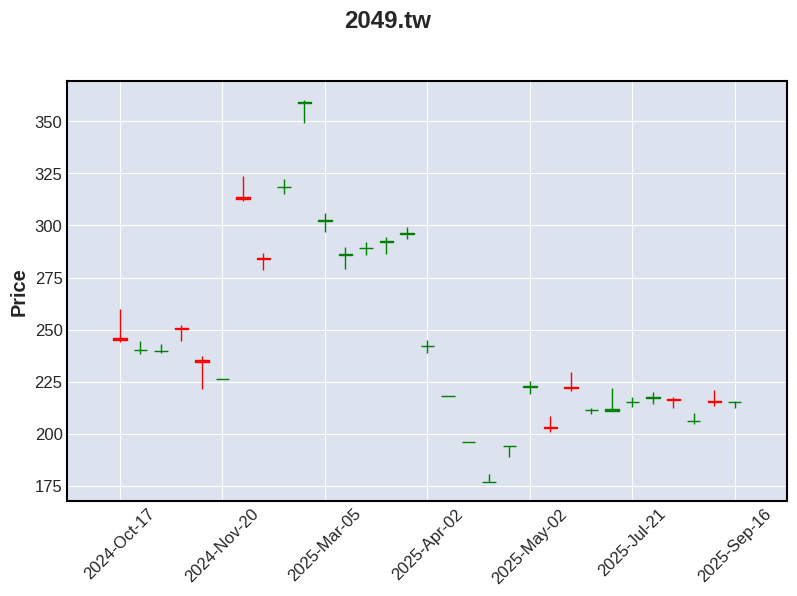

In [ ]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

# <b>3. 機器學習預測股價漲跌</b>
技術指標當特徵，用線性回歸、決策樹、隨機森林預測股價漲跌

## 3.1 資料前處理

In [ ]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [ ]:
# 標籤: 預測未來1天的價格，舉例說明:用技術指標預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# 使用特徵
X = df[['20_SMA', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((218, 3), (218,))

In [ ]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((174, 3), (44, 3), (174,), (44,))

## 3.2 線性回歸（Linear Regression）

In [ ]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")

線性回歸模型RMSE: 6.74
線性回歸模型預測未來1天的價格: 221.97


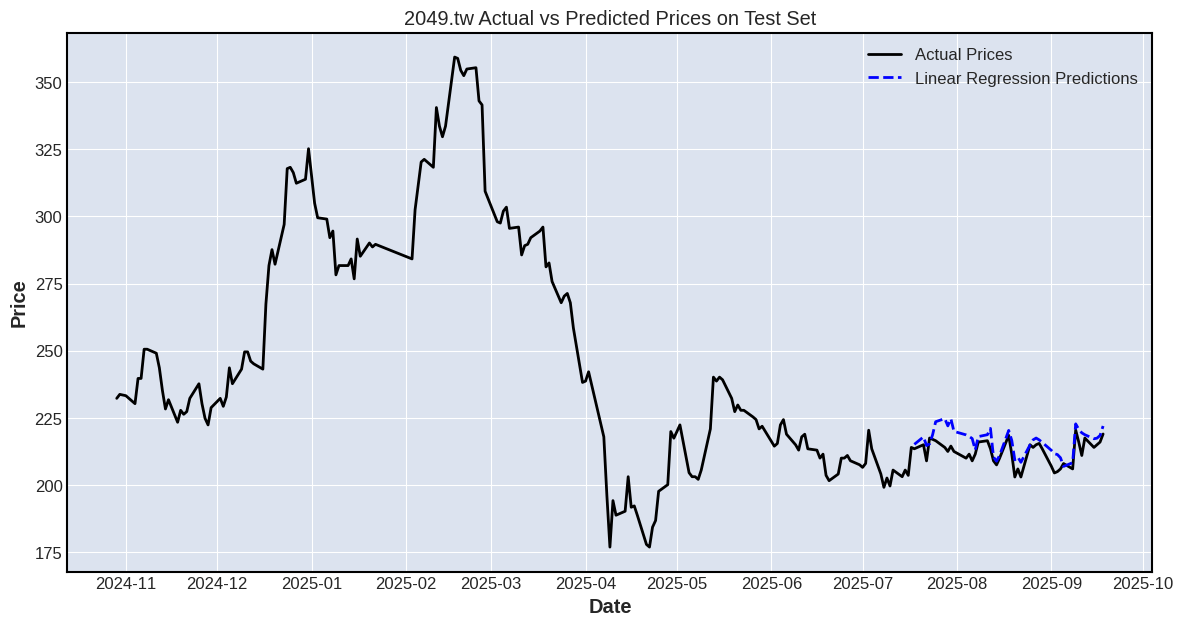

In [ ]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock_id} Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.2 決策樹（Decision Tree）

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# 建立並訓練決策數模型
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 10.12
決策樹模型預測未來1天的價格: 204.09


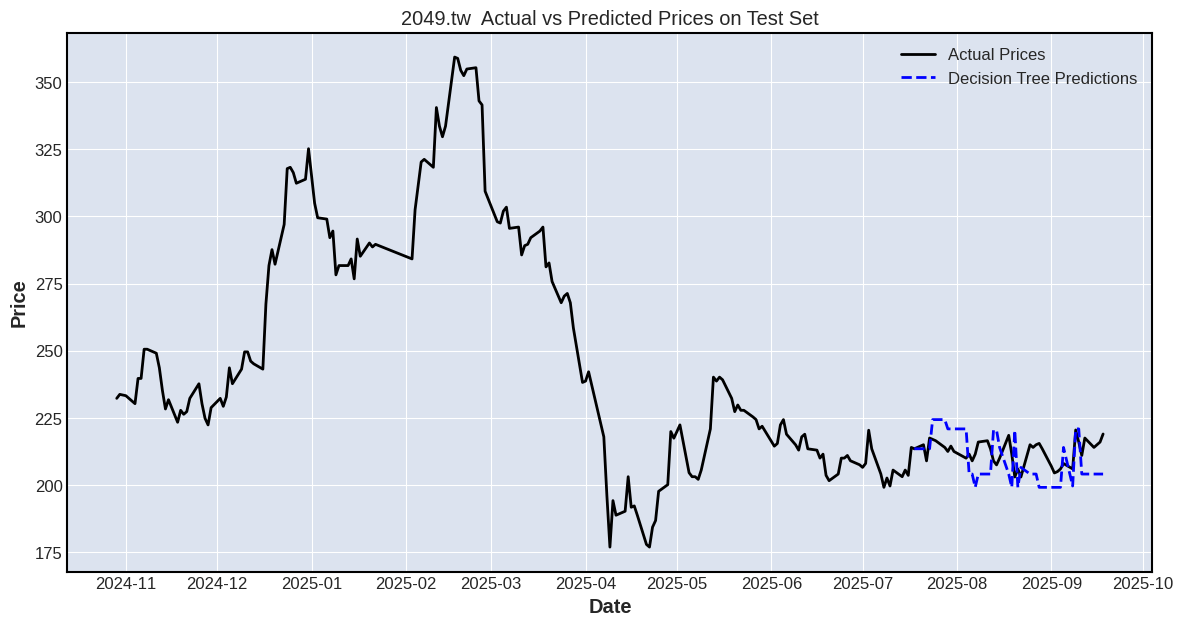

In [ ]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock_id}  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.3 隨機森林（Random Forest）

In [ ]:
# 引入隨機森林模型
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練決策數模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 5.55
隨機森林模型預測未來1天的價格: 216.87


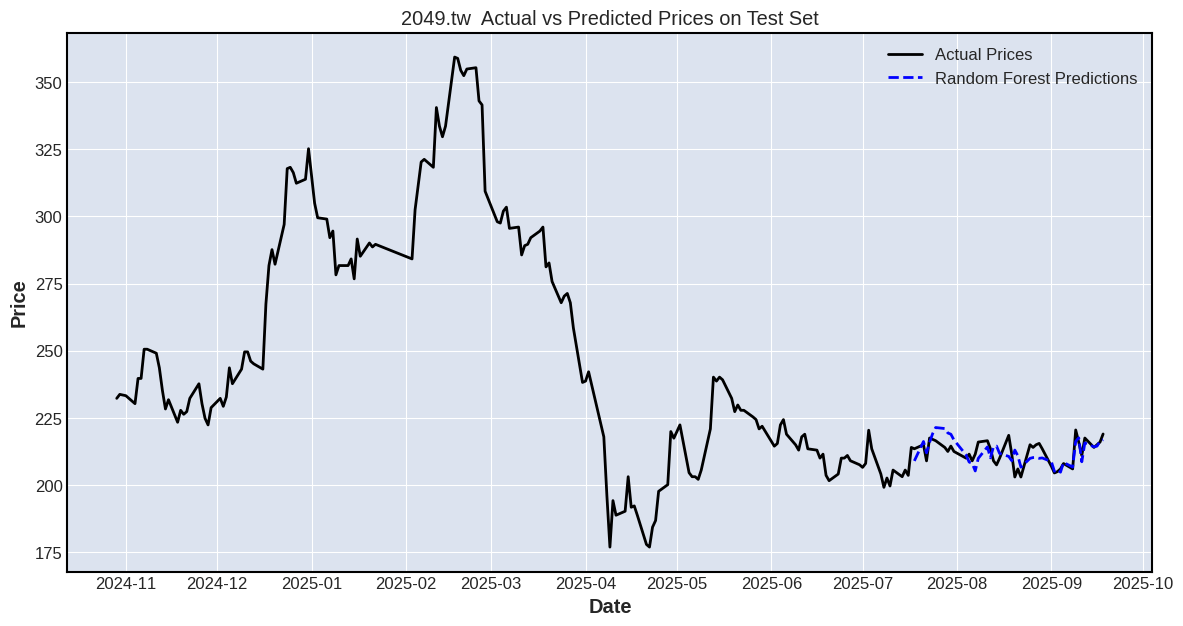

In [ ]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock_id}  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# 補充：在 Colab 上使用中文字體

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-09-22 14:12:11--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 192.178.129.139, 192.178.129.138, 192.178.129.101, ...
Connecting to drive.google.com (drive.google.com)|192.178.129.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-09-22 14:12:11--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  53.0MB/s    in 0.4s    

2025-09-22 14

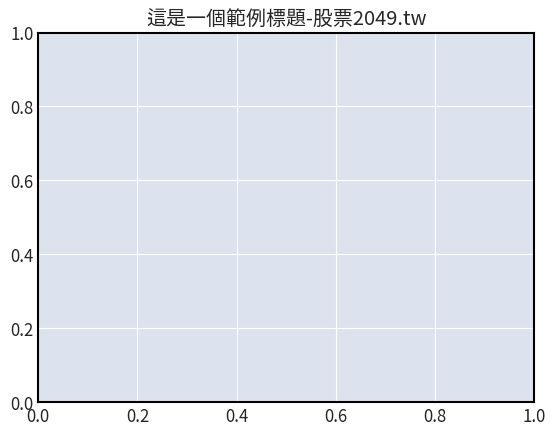

In [ ]:
# 繪製範例圖表
plt.title(f"這是一個範例標題-股票{stock_id}")
plt.show()

# Pandas Shift

In [ ]:
temp_df = pd.DataFrame({
    'Date': ['2025-9-15', '2025-9-16', '2025-9-17', '2025-9-18', '2025-9-19','2025-9-22'],
    'Close': [214.0, 215.0, 216.0, 219.0, 223.0, 220.5]
})
temp_df

,Date,Close
0,2025-9-15,214.0
1,2025-9-16,215.0
2,2025-9-17,216.0
3,2025-9-18,219.0
4,2025-9-19,223.0
5,2025-9-22,220.5


In [ ]:
temp_df['Future'] = temp_df['Close'].shift(-1)
temp_df

,Date,Close,Future
0,2025-9-15,214.0,215.0
1,2025-9-16,215.0,216.0
2,2025-9-17,216.0,219.0
3,2025-9-18,219.0,223.0
4,2025-9-19,223.0,220.5
5,2025-9-22,220.5,NaN


In [ ]:
temp_df.dropna(inplace=True) #dropna移除所有包含 NaN (缺失值) 的列
temp_df

,Date,Close,Future
0,2025-9-15,214.0,215.0
1,2025-9-16,215.0,216.0
2,2025-9-17,216.0,219.0
3,2025-9-18,219.0,223.0
4,2025-9-19,223.0,220.5


In [ ]:
sk_df = pd.DataFrame({
    'Date': ['2025-9-15', '2025-9-16', '2025-9-17', '2025-9-18', '2025-9-19','2025-9-22'],
    '技術指標1(8_SMA)': [212.375, 213.5, 214.5, 216.125, 216.4375, 000],
    '技術指標2': [111, 222, 333, 444, 555, 666],
    '技術指標3': [111, 222, 333, 444, 555, 666],
    '技術指標4': [111, 222, 333, 444, 555, 666],
    'Close': [356, 363, 368, 370, 374, 366]
})
sk_df

,Date,技術指標1(8_SMA),技術指標2,技術指標3,技術指標4,Close
0,2025-9-15,212.3750,111,111,111,356
1,2025-9-16,213.5000,222,222,222,363
2,2025-9-17,214.5000,333,333,333,368
3,2025-9-18,216.1250,444,444,444,370
4,2025-9-19,216.4375,555,555,555,374
5,2025-9-22,0.0000,666,666,666,366


In [ ]:
n = 3
sk_df.iloc[-n:]

,Date,技術指標1(8_SMA),技術指標2,技術指標3,技術指標4,Close
3,2025-9-18,216.1250,444,444,444,370
4,2025-9-19,216.4375,555,555,555,374
5,2025-9-22,0.0000,666,666,666,366
